In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris=load_iris()

In [6]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.drop(['sepal length (cm)','sepal width (cm)'],axis='columns', inplace=True)
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [0]:
from sklearn.cluster import KMeans

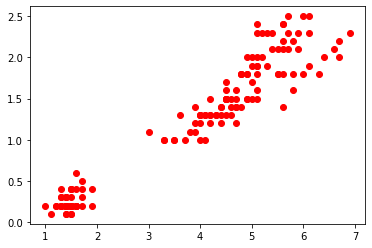

In [9]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'],color='red')

In [0]:
sse=[]
for k in range(1,10):
  km=KMeans(n_clusters=k)
  km.fit(data)
  sse.append(km.inertia_)

In [11]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.051428739411808,
 9.19386673204751,
 7.799761904761905,
 6.592736809084634]

In [0]:
kr=range(1,10)

Text(0, 0.5, 'SSE')

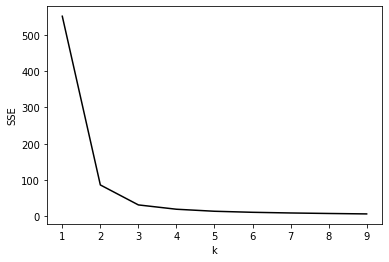

In [13]:
plt.plot(kr,sse,color='black')
plt.xlabel('k')
plt.ylabel('SSE')

In [0]:
#Thats mean K value 3 is optimal

In [0]:
km=KMeans(n_clusters=3)

In [0]:
y_predict=km.fit_predict(data)

In [18]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [19]:
data['cluster']=y_predict
data.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [20]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

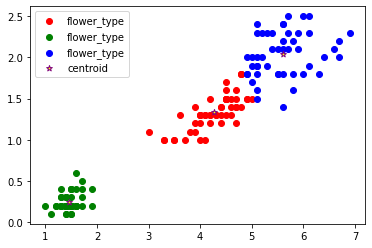

In [23]:
d1=data[data['cluster']==0]
d2=data[data['cluster']==1]
d3=data[data['cluster']==2]

plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'],color='red',label='flower_type')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'],color='green',label='flower_type')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'],color='blue',label='flower_type')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid',edgecolors='purple')
plt.legend()